# SMM768: Group Assignment 1 - Group 1 

Loading required packages

In [1]:
#pip install h5py

In [2]:
#pip install keras_tuner

     |████████████████████████████████| 98 kB 3.6 MB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import imblearn as im
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
import keras_tuner as kt
import h5py


# Question 1
**Question:** </br>
*Briefly discuss why it is more difficult to find a good classifier on such a dataset than on
one where, for example, 5,000 claims are fraudulent, and 5,000 are not. In particular,
consider what happens when undetected fraudulent claims are very costly to the
insurance company.*

Machine learning algorithms tend to operate under the assumption of data being evenly distributed between classes. This would lead to the model not having enough data to learn the patterns present in minority classes. While working with imbalanced data, conventional model evaluation methods will not measure the model performance accurately. For example, in a dataset with an event rate of 2% (2% minority class observations), a model with 98% accuracy that classifies all majority class observations and dismisses all minority observations as noise will have very poor performance. This performance will affect the costs of the company as the company might wrongly fulfill fradulent claims and spend resources investigating non-fradulent claims that may have been misclassified.
The necessity of building a model which can accurately identify fraudulent car insurance claims and prevent the insurance provider paying out for these claims.

# Question 2
**Question:** </br>
*Load the dataset "Insurance_claims.csv" and clean it as appropriate for use with
machine learning algorithms. A description of the features can be found at the end of
this document.*

## Load data

Loading the insurance claims dataset

In [4]:
df = pd.read_csv("Insurance_claims.csv")

## Data cleaning

### Delete rows with duplicates over all columns 
</br>
We begin our data cleaning by checking for duplicates, deleting any observations for customers that are seen multiple times.

Identifying duplicated rows over all columns

In [5]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

       PolicyholderNumber  FirstPartyVehicleNumber  ThirdPartyVehicleNumber  \
3450               564020                 754834.0                      NaN   
3451               564020                 754834.0                      NaN   
3452               564020                 754834.0                      NaN   
4280               724264                 968515.0                1007345.0   
4281               724264                 968515.0                1007345.0   
4813               550279                 739198.0                1022681.0   
4814               550279                 739198.0                1022681.0   
6190               336660                 510694.0                      NaN   
6191               336660                 510694.0                      NaN   
8448               564665                1010712.0                      NaN   
8449               564665                1010712.0                      NaN   
10591              608685                 810142.0  

Dropping the duplicates from the dataset

In [6]:
df = df.drop_duplicates()

### NA values & Imputation

Checking column datatypes

As we intend to normalise the data later in our data processing stage, we transform our data to contain only numerical values such as float64 and int64.

In [7]:
df.dtypes

PolicyholderNumber                   int64
FirstPartyVehicleNumber            float64
ThirdPartyVehicleNumber            float64
InsurerNotes                        object
PolicyholderOccupation              object
LossDate                            object
FirstPolicySubscriptionDate         object
ClaimCause                          object
ClaimInvolvedCovers                 object
DamageImportance                    object
FirstPartyVehicleType               object
ConnectionBetweenParties            object
PolicyWasSubscribedOnInternet        int64
NumberOfPoliciesOfPolicyholder       int64
FpVehicleAgeMonths                 float64
EasinessToStage                    float64
ClaimWihoutIdentifiedThirdParty      int64
ClaimAmount                        float64
LossHour                           float64
PolicyHolderAge                    float64
NumberOfBodilyInjuries               int64
FirstPartyLiability                float64
Fraud                                int64
LossAndHold

Checking for NA values

In [8]:
df.isna().sum()

PolicyholderNumber                     0
FirstPartyVehicleNumber              495
ThirdPartyVehicleNumber            11146
InsurerNotes                        2351
PolicyholderOccupation               342
LossDate                               0
FirstPolicySubscriptionDate            0
ClaimCause                           193
ClaimInvolvedCovers                  191
DamageImportance                   10784
FirstPartyVehicleType                 12
ConnectionBetweenParties           11424
PolicyWasSubscribedOnInternet          0
NumberOfPoliciesOfPolicyholder         0
FpVehicleAgeMonths                    12
EasinessToStage                        0
ClaimWihoutIdentifiedThirdParty        0
ClaimAmount                            0
LossHour                              94
PolicyHolderAge                       36
NumberOfBodilyInjuries                 0
FirstPartyLiability                    0
Fraud                                  0
LossAndHolderPostCodeSame              0
dtype: int64

### Imputation of categorical columns

Fill in NA values for categorical columns

We impute the NA values in the data by creating categories for the same, using ordinal encoding to give numerical values to the various categoies.

In [9]:
df["PolicyholderOccupation"].fillna("No_Occupation", inplace = True) 
df["ClaimCause"].fillna("No_Cause", inplace = True) 
df["ClaimInvolvedCovers"].fillna("No_ClaimInvolvedCovers", inplace = True) 
df["DamageImportance"].fillna("No_DamageImportance", inplace = True)
df["FirstPartyVehicleType"].fillna("No_FirstPartyVehicleType", inplace = True) 
df["ConnectionBetweenParties"].fillna("No_ConnectionBetweenParties", inplace = True)

Creating dummy variables for the categorical variables

In [10]:
#Dummy for PolicyholderOccupation
df = pd.get_dummies(df, columns=['PolicyholderOccupation'], drop_first=False)
df.drop(['PolicyholderOccupation_No_Occupation'], axis=1, inplace=True)

#Dummy for ClaimCause
df = pd.get_dummies(df, columns=['ClaimCause'], drop_first=False)
df.drop(['ClaimCause_No_Cause'], axis=1, inplace=True)

#Dummy for DamageImportance
df = pd.get_dummies(df, columns=['DamageImportance'], drop_first=False)
df.drop(['DamageImportance_No_DamageImportance'], axis=1, inplace=True)

#Dummy for FirstPartyVehicleType
df = pd.get_dummies(df, columns=['FirstPartyVehicleType'], drop_first=False)
df.drop(['FirstPartyVehicleType_No_FirstPartyVehicleType'], axis=1, inplace=True)

#Dummy for ConnectionBetweenParties
df = pd.get_dummies(df, columns=['ConnectionBetweenParties'], drop_first=False)
df.drop(['ConnectionBetweenParties_No_ConnectionBetweenParties'], axis=1, inplace=True)

Combining rare categories

In [11]:
# Get a list of the top 10 
top10 = df['ClaimInvolvedCovers'].value_counts()[:10].index
# At locations where the variable is NOT in the top 10,input as other
df.loc[~df['ClaimInvolvedCovers'].isin(top10), 'ClaimInvolvedCovers'] = 'OTHER'

In [12]:
#Dummy for ClaimInvolvedCovers
df = pd.get_dummies(df, columns=['ClaimInvolvedCovers'], drop_first=False)
df.drop(['ClaimInvolvedCovers_OTHER'], axis=1, inplace=True)

### Imputation of custom text columns

Setting NA values in note columns to an empty value. This column will be used to calculate a new featured column

In [13]:
df['InsurerNotes'].fillna("", inplace = True) 

### Imputaiton of other numerical columns with empty cells

FpVehicleAgeMonths 

In [14]:
print('Mean of FpVehicleAgeMonths used in imputation: ' + str(round(df['FpVehicleAgeMonths'].loc[df['FpVehicleAgeMonths'].notna()].mean(),2)))
df["FpVehicleAgeMonths"].fillna(df["FpVehicleAgeMonths"].mean(), inplace=True)

Mean of FpVehicleAgeMonths used in imputation: 113.46


LossHour 

In [15]:
print('Mean of LossHour used in imputation: ' + str(round(df['LossHour'].loc[df['LossHour'].notna()].mean(),2)))
df["LossHour"].fillna(df["LossHour"].mean(), inplace=True)

Mean of LossHour used in imputation: 8.27


PolicyHolderAge

In [16]:
print('Mean of PolicyHolderAge used in imputation: ' + str(round(df['PolicyHolderAge'].loc[df['PolicyHolderAge'].notna()].mean(),2)))
df["PolicyHolderAge"].fillna(df["PolicyHolderAge"].mean(), inplace=True)

Mean of PolicyHolderAge used in imputation: 44.58


## Feature engineering

Adding additional features based on already existing columns to create more variance in the dataset and hence a better model.

Adding feature based on calculating the number of days between the first policy subscription date and the claim loss date.

In [17]:
#Converting date columns to date time format
df['LossDate'] = pd.to_datetime(df['LossDate'])
df['FirstPolicySubscriptionDate'] = pd.to_datetime(df['FirstPolicySubscriptionDate'])

# Calculating diff between the dates
df['date_diff'] = (df['LossDate'] - df['FirstPolicySubscriptionDate']).dt.days

# Splitting the two date columns into three columns each date column. One for day, one for month and one for year.
# Spit loss date
df["loss_day"] = df['LossDate'].map(lambda x: x.day)
df["loss_month"] = df['LossDate'].map(lambda x: x.month)
df["loss_year"] = df['LossDate'].map(lambda x: x.year)
# Spit First Policy Subscription Date
df["subscription_day"] = df['FirstPolicySubscriptionDate'].map(lambda x: x.day)
df["subscription_month"] = df['FirstPolicySubscriptionDate'].map(lambda x: x.month)
df["subscription_year"] = df['FirstPolicySubscriptionDate'].map(lambda x: x.year)

# Deleting date fields as they are not needed anymore
del df['LossDate']
del df['FirstPolicySubscriptionDate']

Adding feature based on the character length of the note column and dropping column `'InsurerNotes'`.

In [18]:
df['note_length'] = df['InsurerNotes'].str.len()
del df['InsurerNotes']

Adding feature based on the total number of claims per policy holder

In [19]:
df['total_claim_count'] = df.groupby('PolicyholderNumber')['PolicyholderNumber'].transform('count')

### ID Numbers

We intend to create a model that is able to predict insurance fraud on a general basis. The unique ID-numbers will not provide variance to the dataset that help in that matter.
We will feature engineer information about how many claims a policy holder has, but will delete the following ID columns:
- `'PolicyHolderNumber`' 
- `'FirstPartyVehicleNumber'`
- `'ThirdPartyVehicleNumber'`

In [20]:
del df['PolicyholderNumber']
del df['FirstPartyVehicleNumber']
del df['ThirdPartyVehicleNumber']

Checking datatypes after filling NA's, encoding and datatype changes

In [21]:
df.dtypes

PolicyWasSubscribedOnInternet        int64
NumberOfPoliciesOfPolicyholder       int64
FpVehicleAgeMonths                 float64
EasinessToStage                    float64
ClaimWihoutIdentifiedThirdParty      int64
                                    ...   
subscription_day                     int64
subscription_month                   int64
subscription_year                    int64
note_length                          int64
total_claim_count                    int64
Length: 71, dtype: object

Check that there are no empty cells left in the dataframe

In [22]:
df.isna().sum()

PolicyWasSubscribedOnInternet      0
NumberOfPoliciesOfPolicyholder     0
FpVehicleAgeMonths                 0
EasinessToStage                    0
ClaimWihoutIdentifiedThirdParty    0
                                  ..
subscription_day                   0
subscription_month                 0
subscription_year                  0
note_length                        0
total_claim_count                  0
Length: 71, dtype: int64

## Checking for columns with simular values in all cells

No columns have similar value in all rows. If there were similar values in some of the columns we could have deleted the columns as it contains no variance that the network can learn upon.

In [23]:
df.nunique()

PolicyWasSubscribedOnInternet         2
NumberOfPoliciesOfPolicyholder       17
FpVehicleAgeMonths                  389
EasinessToStage                       4
ClaimWihoutIdentifiedThirdParty       2
                                   ... 
subscription_day                     31
subscription_month                   12
subscription_year                     5
note_length                        1649
total_claim_count                     8
Length: 71, dtype: int64

## Split the data in training, validation and test data

In [24]:
X_train, X_other, y_train, y_other = train_test_split(df.loc[:, df.columns != 'Fraud'], df['Fraud'], train_size=0.7, random_state=500)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=188)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(8065, 70)
(1729, 70)
(1728, 70)


## Normalization/Scaling

**Should Scaling/Normalization be applied?**

When we create a neural network, unnormalized input can result in unstable and slow learning processes. Unnormalized models will be slower to learn because the learning speed is proportinal with the magnitude of the inputs and the scale of the input variables will effect the step size of the gradient decent and different scale of the input will thereby slow down the learning process as the gradient decent will go in "zic-zac" towards the minima and not as straight as possible. The output of unnormalized models might be unstable because with input of different scale the inputs with a larger scale end up with a greater influence than the input of smaller scale. 
</br>
It might be beneficial to batch-normalize the deeper layers of the network later in the process.
</br>
First we start by normalizing all variables used by the model between 0 and 1.



In [25]:
normalizer = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = normalizer.transform(X_train)

# transform training data
X_valid_norm = normalizer.transform(X_valid)

# transform testing dataabs
X_test_norm = normalizer.transform(X_test)

Spesifying the metrics to use for our models

In [26]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# Question 3
**Question:** </br>
*Start by creating a (deep) neural network in TensorFlow and train it on the data. Using
training and validation sets, find a model with high accuracy, then evaluate it on the test
set. In particular, record both the accuracy and AUC. Briefly discuss what issues you
observe based on the metrics.*

Clearing the session

In [27]:
tf.keras.backend.clear_session()
np.random.seed(745)
tf.random.set_seed(498)

Creating a deeper neural network

In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation="relu", input_shape=(X_train.shape[1],)))
#model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

To optimize the model, we used a number of combinations of layers and activation functions. Above is a neural network with a high accuracy.

Summary of the model

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                710       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


Visualize network

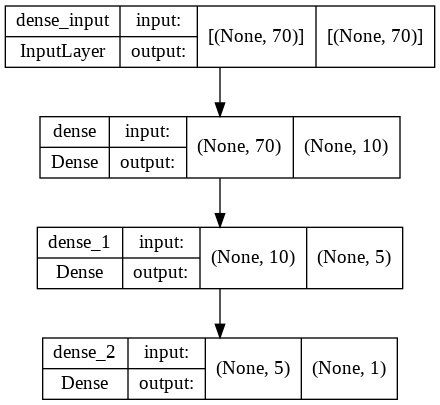

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True)

Compile model

In [31]:
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=METRICS)

Train the model

In [32]:
log = model.fit(X_train_norm, y_train, epochs=15,validation_data=(X_test_norm, y_test))

Epoch 1/15
253/253 [==============================] - 5s 9ms/step - loss: 0.9109 - tp: 68.0000 - fp: 7165.0000 - tn: 819.0000 - fn: 13.0000 - accuracy: 0.1100 - precision: 0.0094 - recall: 0.8395 - auc: 0.4642 - prc: 0.0107 - val_loss: 0.7326 - val_tp: 13.0000 - val_fp: 1020.0000 - val_tn: 690.0000 - val_fn: 5.0000 - val_accuracy: 0.4068 - val_precision: 0.0126 - val_recall: 0.7222 - val_auc: 0.5435 - val_prc: 0.0175
Epoch 2/15
253/253 [==============================] - 1s 3ms/step - loss: 0.6660 - tp: 18.0000 - fp: 2144.0000 - tn: 5840.0000 - fn: 63.0000 - accuracy: 0.7263 - precision: 0.0083 - recall: 0.2222 - auc: 0.5332 - prc: 0.0103 - val_loss: 0.6146 - val_tp: 3.0000 - val_fp: 140.0000 - val_tn: 1570.0000 - val_fn: 15.0000 - val_accuracy: 0.9103 - val_precision: 0.0210 - val_recall: 0.1667 - val_auc: 0.5227 - val_prc: 0.0146
Epoch 3/15
253/253 [==============================] - 1s 3ms/step - loss: 0.5803 - tp: 1.0000 - fp: 265.0000 - tn: 7719.0000 - fn: 80.0000 - accuracy: 0.9572

Saving the basic model

In [33]:
model.save("original_data_model.h5")

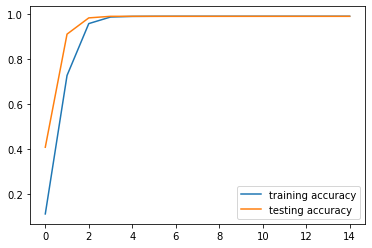

In [34]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "testing accuracy")
plt.legend()
plt.show()

In [35]:
model.evaluate(X_test_norm,y_test)

54/54 [==============================] - 0s 2ms/step - loss: 0.2594 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 1710.0000 - fn: 18.0000 - accuracy: 0.9896 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5637 - prc: 0.0135


[0.2593625783920288,
 0.0,
 0.0,
 1710.0,
 18.0,
 0.9895833134651184,
 0.0,
 0.0,
 0.5637264847755432,
 0.013477151282131672]

The above graph shows the accuracy of a (deep) neural network that is built using the insurance_claims dataset. The graph shows a high accuracy of the model on the test data. While such a result is favourable in most cases, here, the imbalance of the data makes it such that even if all the cases are classified as non-fraudulent (0), the accuracy of the model is approximately 99%. Therefore, it is more approporiate to visualise a confusion matrix to evaluate the classification accuracy of this model.

### Visualisation of a confusion matrix

Creating the confusion matrix

In [36]:
Y_pred=model.predict(X_test_norm)
Y_pred = np.where(Y_pred > 0.5, 1, 0)

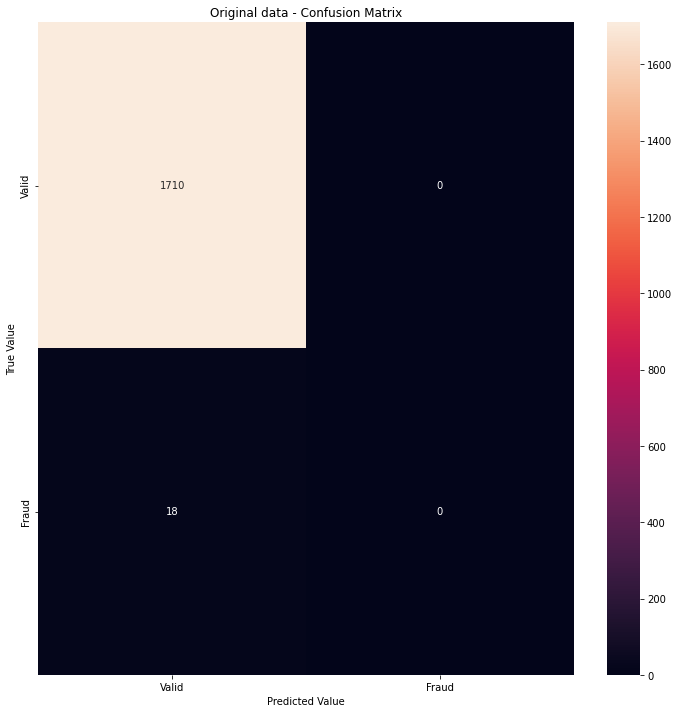

In [37]:
labels= ['Valid', 'Fraud'] 
conf_matrix=confusion_matrix(y_test, Y_pred) 
plt.figure(figsize=(12, 12)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Original data - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

The above confusion matrix shows how the model classifies the test dataset into the two outcome classes. From the visualisation, we can see that the model is classifying all observations as non-fraudulent, misclassifying all of the fraudulent claims in the datset. For an insurance provider, such a result has negative implications as they incur the cost of fulfilling any misclassified fraudulent claims. This misclassification will also have an impact on the accuracy metrics of the classification, as the true-positives, (frauds detected as frauds) = 0. This means that the precision and recall (sensitivity) of the model are both 0, and the insights generated from the model are minimal. The F1 score, a metric that measures model accuracy as a function of the precision and recall will also be 0 because of this. </br>
In our analysis of this dataset, we aim to optimize the precision of the relevant classification model as this shows the accuracy of the model in predicting a false claim correctly. This metric would be the more relevant to an insurance provider as it will allow them to reduce the costs associated to a false claim.

In [38]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

AUC

In [39]:
auc1 = metrics.roc_auc_score(y_test,classes_x)
print('AUC: %f' % auc1)

AUC: 0.500000


Accuracy

In [40]:
# accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy1 = accuracy_score(y_test,classes_x)
print('Accuracy: %f' % accuracy1)

Accuracy: 0.989583


Precision

In [41]:
# precision = tp / (tp + fp)
precision1 = precision_score(y_test,classes_x)
print('Precision: %f' % precision1)

Precision: 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall Score

In [42]:
# recall = tp / (tp + fn)
recall1 = recall_score(y_test,classes_x)
print('Recall: %f' % recall1)

Recall: 0.000000


F1-Score

In [43]:
# f1: 2 tp / (2 tp + fp + fn)
f11 = f1_score(y_test,classes_x)
print('F1 score: %f' % f11)

F1 score: 0.000000


# Question 4
**Question:** </br>
*The file "SMOTE.ipynb" explains the process in detail and shows how to change the
dataset with an example. You can copy and adjust the code to make it work within your
analysis. You can adjust the "sampling_strategy" parameters as you see fit, particularly if
you want to fine-tune your model in part 5.*

Due to the imbalance in the outcome observations of the data, any models that try to fit the data could achieve a 99% accuracy rate by classifying all of the observations as non-fradulent, reducing the ability of a user to generate any insights from the data and increasing any costs that arise from fradulent claims. The synthetic-minority over sampling technique (SMOTE), as introduced in the Journal of Artificial Intelligence, allows a user to synthetically generate additional observations in the case of an imbalanced dataset. SMOTE oversamples examples in the minority class by duplicating them prior to fitting them in a model. In this case, a combination of oversampling and undersampling techniques are used to improve the balance of the dataset. Undersampling involves discarding observations from the majority class whereas oversampling involves replicating datapoints in the minority class of the dataset.

### SMOTE split

In [44]:
X_train_smote, X_valid_smote, y_train_smote, y_valid_smote = train_test_split(df.loc[:, df.columns != 'Fraud'], df['Fraud'], train_size=0.7, random_state=256)
print(X_train_smote.shape)
print(X_valid_smote.shape)

(8065, 70)
(3457, 70)


### Normalize SMOTE Split

In [45]:
normalizer = MinMaxScaler().fit(X_train_smote)

# transform training data
X_train_smote_norm = normalizer.transform(X_train_smote)

# transform training data
X_valid_smote_norm = normalizer.transform(X_valid_smote)

### Apply SMOTE - Over and Undersampling

In [46]:
# Smote train
over = im.over_sampling.SMOTE(sampling_strategy=0.5, random_state = 200)
under = im.under_sampling.RandomUnderSampler(sampling_strategy=0.5, random_state = 223)
steps = [('o', over), ('u', under)]
pipeline = im.pipeline.Pipeline(steps=steps)
X_train_synth, y_train_synth = pipeline.fit_resample(X_train_smote_norm, y_train_smote)


# Smote validation
over = im.over_sampling.SMOTE(sampling_strategy=0.5, random_state = 256)
under = im.under_sampling.RandomUnderSampler(sampling_strategy=0.5, random_state = 643)
steps = [('o', over), ('u', under)]
pipeline = im.pipeline.Pipeline(steps=steps)
X_valid_synth, y_valid_synth = pipeline.fit_resample(X_valid_smote_norm, y_valid_smote)

### Percentage of fraudulant cases after SMOTE

By visualizing the distributions, we can see that the observations are more evenly balanced compared to the original dataset.

In [47]:
og_fraud_y = df['Fraud'].sum()
og_fraud_n = len(df['Fraud']) - og_fraud_y

In [48]:
smote_fraud_y = sum(y_train_synth==1) + sum(y_valid_synth==1)
smote_fraud_n = sum(y_train_synth==0) + sum(y_valid_synth==0)

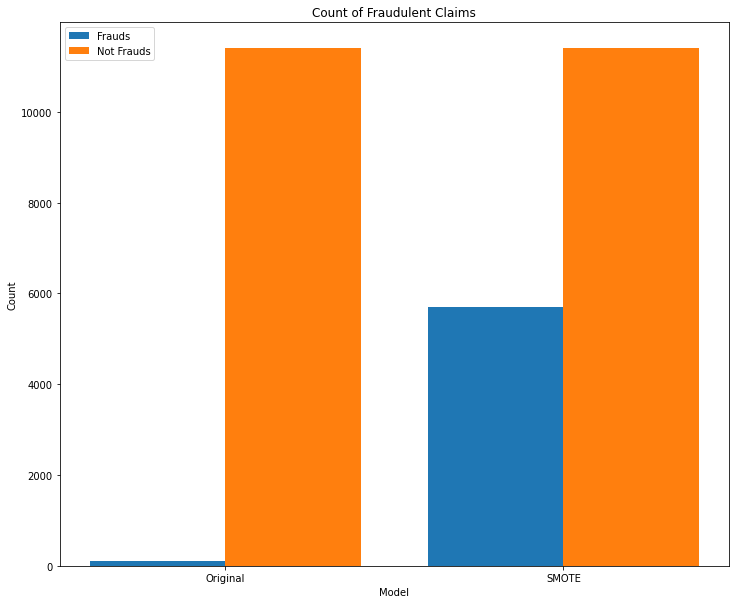

In [49]:
fr = ['Original', 'SMOTE']
frauds = [og_fraud_y, smote_fraud_y]
n_frauds = [og_fraud_n, smote_fraud_n]

x_axis = np.arange(len(fr))
plt.figure(figsize=(12,10))
plt.bar(x_axis - 0.2, frauds, 0.4, label = 'Frauds')
plt.bar(x_axis + 0.2, n_frauds, 0.4, label = 'Not Frauds')

plt.xticks(x_axis, fr)
plt.xlabel("Model")
plt.ylabel("Count")
plt.title("Count of Fraudulent Claims")
plt.legend()
plt.show()

# Question 5
**Question:** </br>
*Create a new (deep) neural network and train it on your enhanced dataset. Use training
and validation sets derived from the enhanced dataset to find a model with high
accuracy. Evaluate your final model on a test set consisting only of original data. Again,
record the accuracy and AUC. Briefly discuss the changes you would expect in the
metrics and the actual changes you observe. Would you say that you are now doing
better at identifying fraudulent claims?*

After applying the smote functions, as the dataset is mode balanced, the model can learn better and improve its predictions. We would expect to see a small fall in the accuracy of the model and improved precision. This is because the model now has additional observations to understand the pattern in the fraudulent data.

## Hyperparameter Tuning

The tuning of different hyperparameters can be difficult to perform without spending a lot of time. It is also hard to keep track of all the performance results with different combinations of hyperparameters.

To be able to tune our hyper parameters in a structured manner we are using Keras Tuning library. 

The library enables us to quicly identify models which are performing well on our focused metrics. As outlined earlier in the document, the metrics we are trying to maximise when we performed the hyperparameter tuning is precision.

### Clear the session

In [50]:
tf.keras.backend.clear_session()
np.random.seed(745)
tf.random.set_seed(498)

The first line of above section of code clears the session and removes all the nodes present from the previous training sessions. 
Setting seed allows the system to generate the same random numbers of multiple executions. 

In [51]:
def train_model(hp):    
    # Defining the hyper parameters to tune
    num_units = hp.Int('num_units', min_value = 2, max_value=20) 
    dropout_rate = hp.Float('dropout_rate', min_value = 0.1, max_value=0.3) 
    optim_algo = hp.Choice('optimizer', values=['sgd','adam']) 
    learning_rate = hp.Float('learning_rate', min_value = 0.001, max_value=1, sampling='log') 
    
    # Defining model
    model_smote_tuned = tf.keras.models.Sequential([
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_units, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation="sigmoid")])
    
    # Tuner is checking for suitability of SGD and Adam optimizers 
    if optim_algo == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate,clipvalue=1)
    elif optim_algo == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # Compiling the model      
    model_smote_tuned.compile(  optimizer=optimizer,
                    loss='mse',
                    metrics=['Precision']) # Specifying that we intend to calculate precision
    
    return model_smote_tuned

The function above will return a tuned model when called. </br>

> num_units refers to multiple parallel LSTM units, which are structurally identical, but learn to remember different things. We've set the units between 2 and 20. </br>


> dropout_rate is a hyperparameter which represents the probability of a neuron activation being set to zero during each taining step. In this case, it is set to 0.1-0.3 or 10-30%. 


> optim_algo refers to the choice of optimiser, in this case, Adam or SGD. Optimisers are built on the idea of gradient descent, or 'the greedy approach of iteratively decreasing the loss function by following the gradient.'


> learning_rate is a hyperparameter which controls how quickly the model can be adapted to the problem. Neural networks use stochastic gradient descent to train the model, updating weights of the model using backpropagation. The amount the weights are updated is the learning rate, here between 0.001 and 1. 

In [52]:
tuner = kt.Hyperband(train_model,
                     objective=kt.Objective("val_precision", direction="max"),
                     max_epochs=10,
                     factor=3,
                     #overwrite=True,
                     seed=768) # Can activate the saving of logs if needed
                     #directory='logs_smote', 
                     #project_name='kt_2')
tuner.search(X_train_synth, y_train_synth, validation_data=(X_valid_synth, y_valid_synth))

Trial 30 Complete [00h 00m 12s]
val_precision: 0.832929790019989

Best val_precision So Far: 0.8396226167678833
Total elapsed time: 00h 03m 00s
INFO:tensorflow:Oracle triggered exit


This block of code uses Keras tuner to find the optimal Hyperparameters for the model. 

In [53]:
best_hps = tuner.get_best_hyperparameters()[0]
print("Best learning rate: " + str(best_hps['learning_rate']))
print("Best optimizer: " + str(best_hps['optimizer']))
print("Best dropout rate: " + str(best_hps['dropout_rate']))
print("Best number of hidden units: " + str(best_hps['num_units']))

Best learning rate: 0.011768592781260759
Best optimizer: adam
Best dropout rate: 0.1540950665513367
Best number of hidden units: 14


### Optimizing Regularizarion

With having the hyperparameters defined by the Keras Tuner, we intend to loop through different levels of regularizations to check if we are able to gain an inhanced model with a high accuracy, AUC and precision. 

In [54]:
def tuning_regularization (x_train, y_train, x_validation, y_validation):

    # Specifying the range of regularization parameters to test
    reg_values = np.arange(0, 0.005, 0.001).tolist()

    # Specifying the hyperparameters given in the Keras Tuner to our model
    num_units = best_hps['num_units']
    dropout_rate = best_hps['dropout_rate'] 
    learning_rate = best_hps['learning_rate']

    reg_results = []

    # Looping through to find best performing model with L1 regularization
    for i, value in enumerate(reg_values):
        # Clear the session
        tf.keras.backend.clear_session()
        np.random.seed(735)
        tf.random.set_seed(298)

        # Set current regularizatoin
        regularizer = tf.keras.regularizers.l1(value)

        # Defining model with hyperparameters found in hyperband above
        model_loop = tf.keras.models.Sequential()
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer , input_shape=[X_train_smote_norm.shape[1]]))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=regularizer))

        # Compiling the model with hyperparameters found in hyperband above
        model_loop.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
                tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

        # Training the model
        smote_logs = model_loop.fit(x_train, y_train, 
                            epochs=20, # Using an arbetrary number of epochs
                            validation_data=(x_validation, y_validation))

        # Appending the results to the result list
        reg_results.append(
            {
                'regularization_type': 'L1 regularization',
                'regularization_value': value,
                'accuracy': smote_logs.history['accuracy'][19],
                'auc':  smote_logs.history['auc'][19],
                'precision': smote_logs.history['precision'][19],
                'recall':  smote_logs.history['recall'][19]
            }
        )

        print('------------------------------- Model run:', i, '/', (len(reg_values)*2)-1, '- Finished running model for L1 regularisation at level: ', value, ' -------------------------------')

    # Looping through to find best performing model with L2 regularization
    for i, value in enumerate(reg_values):
        # Clear the session
        tf.keras.backend.clear_session()
        np.random.seed(735)
        tf.random.set_seed(298)

        # Set current regularizatoin
        regularizer = tf.keras.regularizers.l2(value)

        # Defining model with hyperparameters found in hyperband above
        model_loop = tf.keras.models.Sequential()
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer , input_shape=[X_train_smote_norm.shape[1]]))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
        tf.keras.layers.Dropout(dropout_rate),
        model_loop.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=regularizer))

        # Compiling the model with hyperparameters found in hyperband above
        model_loop.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
                tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')])

        # Training the model
        model_loop.fit(x_train, y_train, 
                        epochs=20, # Using an arbetrary number of epochs
                        validation_data=(x_validation, y_validation))

        # Appending the results to the result list
        reg_results.append(
            {
                'regularization_type': 'L2 regularization',
                'regularization_value': value,
                'accuracy': smote_logs.history['accuracy'][19],
                'auc':  smote_logs.history['auc'][19],
                'precision': smote_logs.history['precision'][19],
                'recall':  smote_logs.history['recall'][19]
            }
        )

        print('------------------------------- Model run:', len(reg_values)+i, '/', (len(reg_values)*2)-1, '- Finished running model for L2 regularisation at level: ', value, ' -------------------------------')

    # Exporting the results to a dataframe
    results = pd.DataFrame(reg_results)

    return results

Running the tuning_regularization function with our Smote data

In [55]:
results_regularization = tuning_regularization(X_train_synth,y_train_synth,X_valid_synth,y_valid_synth)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.2340 - accuracy: 0.8988 - auc: 0.9583 - precision: 0.8397 - recall: 0.8605 - val_loss: 0.8123 - val_accuracy: 0.7962 - val_auc: 0.8515 - val_precision: 0.8013 - val_recall: 0.5167
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1352 - accuracy: 0.9521 - auc: 0.9813 - precision: 0.8969 - recall: 0.9675 - val_loss: 2.0729 - val_accuracy: 0.7654 - val_auc: 0.7430 - val_precision: 0.8614 - val_recall: 0.3528
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.9719 - auc: 0.9901 - precision: 0.9342 - recall: 0.9850 - val_loss: 2.0896 - val_accuracy: 0.7427 - val_auc: 0.7361 - val_precision: 0.8385 - val_recall: 0.2826
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0772 - accuracy: 0.9750 - auc: 0.9925 - precision: 0.9425 - recall: 0.9850 - val_loss: 3.1299 - val_accuracy: 0.7028 - val_auc: 0.6910 - val_precision: 0.77

### Printing results

Printing the dataframe with the results from the optimization of regularization.

We can see that a model without a regularization will perform the best, based on the accuracy and AUC obtained on the validation data in the tuning_regularization function.

In [56]:
sorted_results = results_regularization.sort_values(by=['regularization_type', 'regularization_value'], ascending=True)
sorted_results

,regularization_type,regularization_value,accuracy,auc,precision,recall
0,L1 regularization,0.000,0.994742,0.999006,0.988323,0.995994
1,L1 regularization,0.001,0.976632,0.993496,0.948768,0.982974
2,L1 regularization,0.002,0.946420,0.972439,0.881082,0.970205
3,L1 regularization,0.003,0.940995,0.973257,0.875657,0.959189
4,L1 regularization,0.004,0.939409,0.972441,0.872379,0.958438
5,L2 regularization,0.000,0.939409,0.972441,0.872379,0.958438
6,L2 regularization,0.001,0.939409,0.972441,0.872379,0.958438
7,L2 regularization,0.002,0.939409,0.972441,0.872379,0.958438
8,L2 regularization,0.003,0.939409,0.972441,0.872379,0.958438
9,L2 regularization,0.004,0.939409,0.972441,0.872379,0.958438


## Create optimized model

Based on the results from the hyperband hyperparameter tuning and combined with the regularization optimization, we create a final model that we run on our test data to test performance.

### Defining hyper parameters

Copying the hyperparameters and regularization obtained in earlier step as input to our final model.

In [57]:
# Specifying the hyperparameters given in the Keras Tuner to our model
num_units = best_hps['num_units']
dropout_rate = best_hps['dropout_rate'] 
learning_rate = best_hps['learning_rate']
regularization_rate = 0.000

### Creating model

Creating the final model with identical structure as the model used in the tuning.

In [58]:
# Clear the session
tf.keras.backend.clear_session()
np.random.seed(735)
tf.random.set_seed(298)

# Set current regularizatoin
regularizer = tf.keras.regularizers.l1(regularization_rate)

# Defining final model
model_SMOTE = tf.keras.models.Sequential()
tf.keras.layers.Dropout(dropout_rate),
model_SMOTE.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer , input_shape=[X_train_smote_norm.shape[1]]))
tf.keras.layers.Dropout(dropout_rate),
model_SMOTE.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
tf.keras.layers.Dropout(dropout_rate),
model_SMOTE.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
tf.keras.layers.Dropout(dropout_rate),
#model_SMOTE.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
#tf.keras.layers.Dropout(dropout_rate),
#model_SMOTE.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
#tf.keras.layers.Dropout(dropout_rate),
model_SMOTE.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
tf.keras.layers.Dropout(dropout_rate),
model_SMOTE.add(tf.keras.layers.Dense(num_units, activation="relu", kernel_regularizer=regularizer))
tf.keras.layers.Dropout(dropout_rate),
model_SMOTE.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_regularizer=regularizer))

# Compiling the model with hyperparameters found in hyperband above
model_SMOTE.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=METRICS)

# Training the model
log_smote = model_SMOTE.fit(X_train_synth, y_train_synth, 
                    epochs=40, # Using an arbetrary number of epochs
                    validation_data=(X_valid_synth, y_valid_synth))

# Saving the model
model_SMOTE.save("smote_data_model.h5")

Epoch 1/40
375/375 [==============================] - 5s 7ms/step - loss: 0.2340 - tp: 3437.0000 - fp: 656.0000 - tn: 9042.0000 - fn: 575.0000 - accuracy: 0.9102 - precision: 0.8397 - recall: 0.8567 - auc: 0.9600 - prc: 0.8869 - val_loss: 0.8123 - val_tp: 883.0000 - val_fp: 219.0000 - val_tn: 3199.0000 - val_fn: 826.0000 - val_accuracy: 0.7962 - val_precision: 0.8013 - val_recall: 0.5167 - val_auc: 0.8515 - val_prc: 0.7296
Epoch 2/40
375/375 [==============================] - 1s 3ms/step - loss: 0.1352 - tp: 3864.0000 - fp: 444.0000 - tn: 7544.0000 - fn: 130.0000 - accuracy: 0.9521 - precision: 0.8969 - recall: 0.9675 - auc: 0.9813 - prc: 0.9442 - val_loss: 2.0729 - val_tp: 603.0000 - val_fp: 97.0000 - val_tn: 3321.0000 - val_fn: 1106.0000 - val_accuracy: 0.7654 - val_precision: 0.8614 - val_recall: 0.3528 - val_auc: 0.7430 - val_prc: 0.6767
Epoch 3/40
375/375 [==============================] - 1s 3ms/step - loss: 0.0880 - tp: 3934.0000 - fp: 277.0000 - tn: 7711.0000 - fn: 60.0000 - ac

Plotting the training loss and validation loss over the epoch runs.
</br>
The validation loss is higher than the training loss, which is an indication of overfitting. This might be the case because in our tuning of the hyperparameters we try to maxmize the precision and not validation loss.
The intention of the model is to identify and predicting insurance fraud. When working with frauds it is important to identify fraud, but also not predict fraud when there is no fraud. Focus on the prediction metrics will result in a model which is predicting actual fraud, but not false positives. 


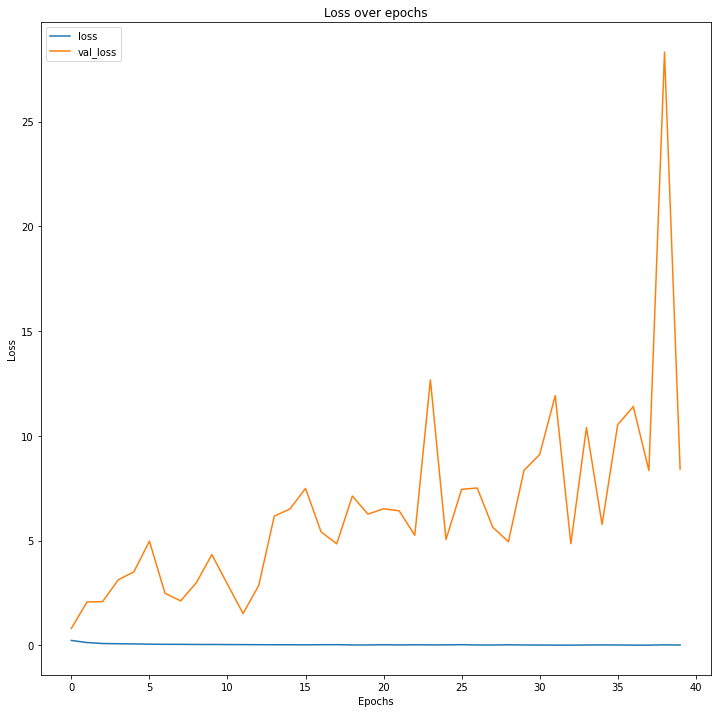

In [59]:
plt.figure(figsize=(12,12))
plt.plot(log_smote.history['loss'])
plt.plot(log_smote.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend(['loss', 'val_loss'])
plt.show()

### Evaluate final SMOTE model

Evaluating the results of the model on Smote data. We can already see that the Smote model is performing a lot better than the initial model with imbalanced data.  

In [60]:
model_SMOTE.evaluate(X_test_norm, y_test)

54/54 [==============================] - 1s 3ms/step - loss: 0.0988 - tp: 14.0000 - fp: 7.0000 - tn: 1703.0000 - fn: 4.0000 - accuracy: 0.9936 - precision: 0.6667 - recall: 0.7778 - auc: 0.8846 - prc: 0.4389


[0.09883252531290054,
 14.0,
 7.0,
 1703.0,
 4.0,
 0.9936342835426331,
 0.6666666865348816,
 0.7777777910232544,
 0.8845516443252563,
 0.4388836920261383]

## Confusion matrix of the SMOTE model

A confusion matrix is a good method to visualize the results of our model, and how well it works as a model for predictions. 
</br>
The results obtained are based on prediction on original data and have not been seen by the model before.

As we see in the confusion matrix, the model is performing well in terms of predicting frauds. The number of false negatives or false posivies are low.

The conclution of using a model trained on SMOTE data to handle imbalanced dataset, is that this model is performing significantly better than the initial model trained on imbalanced data.

In [61]:
Y_pred=model_SMOTE.predict(X_test_norm)
Y_pred = np.where(Y_pred > 0.5, 1, 0)

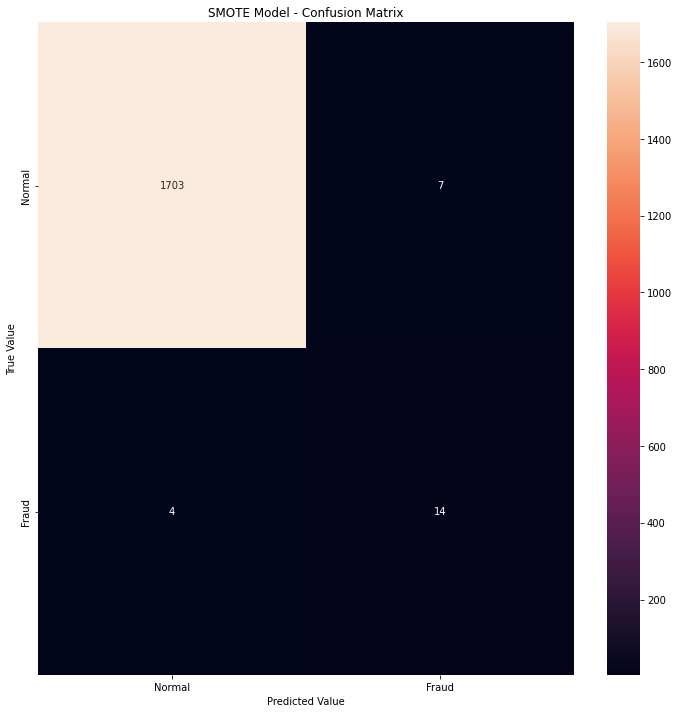

In [62]:
labels= ['Normal', 'Fraud'] 
conf_matrix=confusion_matrix(y_test, Y_pred) 
plt.figure(figsize=(12, 12)) 
sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("SMOTE Model - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

### AUC curve for SMOTE model

Plotting the AUC curve helps us inspect the performance of our SMOTE trained model. 

A well performing model should have an AUC (marked with a blue curve in the plot) that is stretching to the top left corner of the plot. We can see that the AUC for our Smote model have an AUC that is significantly better than random classification (marked with a red dashed curve in the plot).

<function matplotlib.pyplot.show>

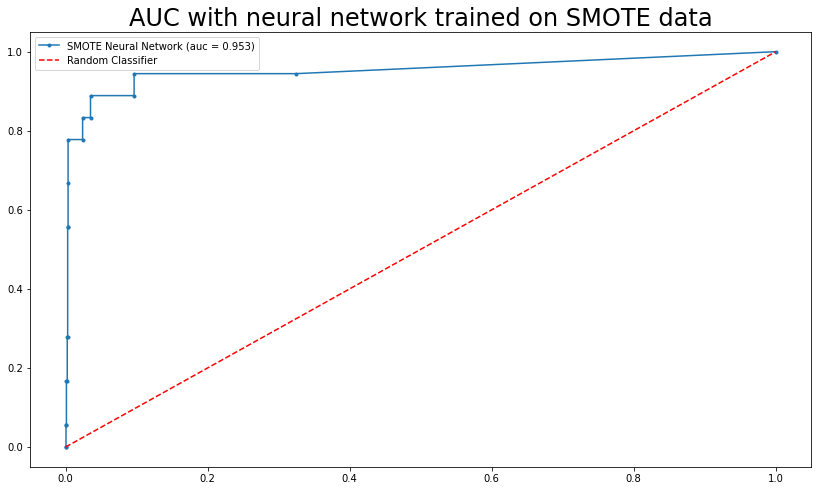

In [63]:
Y_pred_ravel=model_SMOTE.predict(X_test_norm).ravel()

nn_fpr_keras, nn_tpr_keras, nn_threshold_keras = roc_curve(y_test, Y_pred_ravel)
auc_keras = auc(nn_fpr_keras,nn_tpr_keras)

plt.figure(figsize=(14,8))
plt.plot(nn_fpr_keras, nn_tpr_keras, marker=".",label='SMOTE Neural Network (auc = %0.3f)'% auc_keras)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.title("AUC with neural network trained on SMOTE data", size=24)
plt.legend()
plt.show

As expected, we see an improvement in the AUC curve. As a prediction model, it works better in comparison to the previous model by classifying the fraudulent claims with high precision. The small decrease in accuracy is also as expected. This is because there is higher variation in the training data with the enhanced dataset.

# Question 6
**Question:** </br>
*Using the original data, create a training and set that contains only non-fraudulent
claims, as well as validation and test sets that contain non-fraudulent and fraudulent
claims. Make sure to spread fraudulent claims evenly across validation and test sets.*

Split the data

In [64]:
# Non fraudulant claims
non_fraud = df[df.Fraud == 0]
# Fraudulant claims
fraud = df[df.Fraud == 1]

# Selecting 50 % of the non fraudulant dataset as training set
encode_training = non_fraud.sample(frac = 0.5) # For training
# Deleting the fraud output column from the training set
encode_training = encode_training.drop('Fraud', 1)

# Selecting 50 % of the non fraudulant dataset as validation and testing set
encode_valid_test = non_fraud.drop(encode_training.index)
# Inserting the fraudulant claims to the validation and testing set
encode_valid_test = pd.concat([encode_valid_test, fraud]) # For validation and testing / Use train split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


Split to test and validate

In [65]:
X_valid_encode, X_test_encode, y_valid_encode, y_test_encode = train_test_split(encode_valid_test.loc[:, encode_valid_test.columns != 'Fraud'], encode_valid_test['Fraud'], train_size=0.5, random_state=222)
print(X_valid_encode.shape)
print(X_test_encode.shape)

(2909, 70)
(2909, 70)


Normalize data

In [66]:
normalizer = MinMaxScaler().fit(encode_training)

# transform training data
X_train_encode_norm = normalizer.transform(encode_training)

# transform training data
X_valid_encode_norm = normalizer.transform(X_valid_encode)

# transform testing dataabs
X_test_encode_norm = normalizer.transform(X_test_encode)

# Question 7
**Question:** </br>
*Using TensorFlow, create an autoencoder, ensuring that the middle hidden layer has
fewer neurons than your input has features. Use training and validation sets to find a
model that represents its input data well. In particular, you will want to predict your
validation set observations. For each observation, you can measure the difference
between the original observations and the predicted one, using, for example, the mean
squared error of all features of the observation. Plot the errors for all your validation set
observations in a histogram - in a good model, this error should be much higher for
fraudulent claims than non-fraudulent ones.*

## Create Encoding model

An autoencoder is an unsupervised machine learning model that is used to recreate output values that are similar to the input values. The autoencoder contains two parts: 

Encoder: The encoding process compresses the input values to get to the core layer. 

Decoder: The decoding process reconstructs the information to produce the outcome.

As the number of neurons are less than the input features, the model learns to extract the useful information from the input to reduce the "noise". 

The application for an autoencoder for this dataset is typical to anomaly detection. The model is first trained only on non-fraud cases which allows it to learn what a typical non-fraud input looks like. Then we calculate the reconstruction loss, which is the loss between the the actual input and the encoded output, which should be representative of the input. We then test the model on a dataset that contains both fraud and non-fraud cases. We hypothesise that the loss should be low for non-fraud cases as the model has only learned from non-fraud cases. But in the case of fraud, the reconstruction error should be high, as the model has not learned what fraud data should look like. In our case, the anomaly is the fraud case. 

Clean session

In [67]:
tf.keras.backend.clear_session()
np.random.seed(735)
tf.random.set_seed(428)

Regularization parameter

In [68]:
reg_param = 0.001
regularizer = tf.keras.regularizers.l1(reg_param)

Create encoding model

In [69]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu", input_shape=[X_train_encode_norm.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation="relu"),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation="tanh")
    ])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape = (20,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(X_train_encode_norm.shape[1], activation="sigmoid")
    ])

autoencoder = tf.keras.Sequential([encoder,decoder])
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 20)                5700      
                                                                 
 sequential_1 (Sequential)   (None, 70)                5750      
                                                                 
Total params: 11,450
Trainable params: 11,450
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [70]:
autoencoder.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

Fit model

In [71]:
history = autoencoder.fit(x=X_train_encode_norm, y=X_train_encode_norm,
                epochs=30,
                batch_size=32,
                validation_data=(X_valid_encode_norm, X_valid_encode_norm))
                #shuffle=True)

# Saving the model
autoencoder.save("autoencoder_data_model.h5")

Epoch 1/30
179/179 [==============================] - 2s 4ms/step - loss: 0.0822 - accuracy: 0.0773 - val_loss: 0.0443 - val_accuracy: 0.0000e+00
Epoch 2/30
179/179 [==============================] - 1s 4ms/step - loss: 0.0449 - accuracy: 0.0189 - val_loss: 0.0396 - val_accuracy: 0.0014
Epoch 3/30
179/179 [==============================] - 1s 3ms/step - loss: 0.0397 - accuracy: 0.0268 - val_loss: 0.0342 - val_accuracy: 0.0100
Epoch 4/30
179/179 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.0398 - val_loss: 0.0307 - val_accuracy: 0.0461
Epoch 5/30
179/179 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.0414 - val_loss: 0.0283 - val_accuracy: 0.0234
Epoch 6/30
179/179 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.0354 - val_loss: 0.0268 - val_accuracy: 0.0193
Epoch 7/30
179/179 [==============================] - 1s 3ms/step - loss: 0.0295 - accuracy: 0.0366 - val_loss: 0.0258 - val_accuracy: 0.0261
Ep

Plot the losses

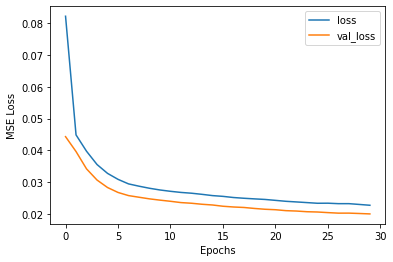

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

The above graph represents the mean of squares of errors between labels and predictions. Observing the shape of the lines, helps us interpret that the learning rate schedule and decay is optimal as it starts high reduces as we move down on the curve. 

To tune the model, we tested the accuracy of the model by changing the following parameters:

1. Changing dropout rates
2. Changing activation functions
3. Chaning regularization parameters

In [73]:
#Find Threshold
def find_threshold(autoencoder, X_train_encoded_norm):
  reconstructions = autoencoder.predict(X_train_encoded_norm)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, X_train_encoded_norm)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

# Get predictions
def get_predictions(autoencoder, X_test_encode_norm, threshold):
  predictions = autoencoder.predict(X_test_encode_norm)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, X_test_encode_norm)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds



threshold = find_threshold(autoencoder, X_test_encode_norm)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(autoencoder, X_test_encode_norm, threshold)
accuracy_score(predictions, y_test_encode)
print("Accuracy:", accuracy_score(predictions, y_test_encode))

Threshold: 0.01637536566054256
Accuracy: 0.16328635269852182


For the fraud detection method, the mean and standard deviation of the reconsruction errors are calculated. If an error is 1 standard deviation away from the mean, that data point is identified as an anomaly which in our case is the a fraud.

In [74]:
predictions = autoencoder.predict(X_valid_encode_norm) # Test will full dataset
mse = np.mean(np.power(X_valid_encode_norm - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_valid_encode})
error_df.describe()

,reconstruction_error,true_class
count,2909.000000,2909.000000
mean,0.020026,0.019594
std,0.013019,0.138626
min,0.001746,0.000000
25%,0.009706,0.000000
50%,0.016586,0.000000
75%,0.027337,0.000000
max,0.088989,1.000000


### Reconstruction error on the validation data

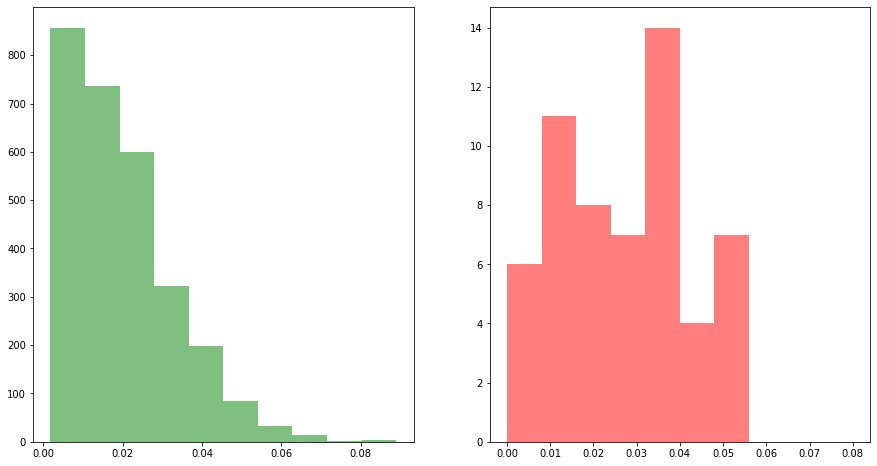

In [75]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10, color = "green", alpha = 0.5)

ax1 = fig.add_subplot(122)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax1.hist(fraud_error_df.reconstruction_error.values, bins=10, color = "red", alpha = 0.5, range=(0, 0.08))

# Question 8
**Question:** </br>
*Use your trained autoencoder to predict the test set and define the corresponding
losses. Create a histogram of your test set claims, clearly marking fraudulent and nonfraudulent claims. Discuss how you could use this to decide whether a transaction is
fraudulent or not. Can you also derive an AUC in this approach - if yes, how does it
perform compared to the previous approaches?*

### Reconstruction error on the test data

In [76]:
predictions = autoencoder.predict(X_test_encode_norm) # Test will full dataset
mse = np.mean(np.power(X_test_encode_norm - predictions, 2), axis=1)
error_df1 = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test_encode})
error_df1.describe()

,reconstruction_error,true_class
count,2909.000000,2909.000000
mean,0.019915,0.019938
std,0.012720,0.139812
min,0.001950,0.000000
25%,0.009763,0.000000
50%,0.016576,0.000000
75%,0.026853,0.000000
max,0.082072,1.000000


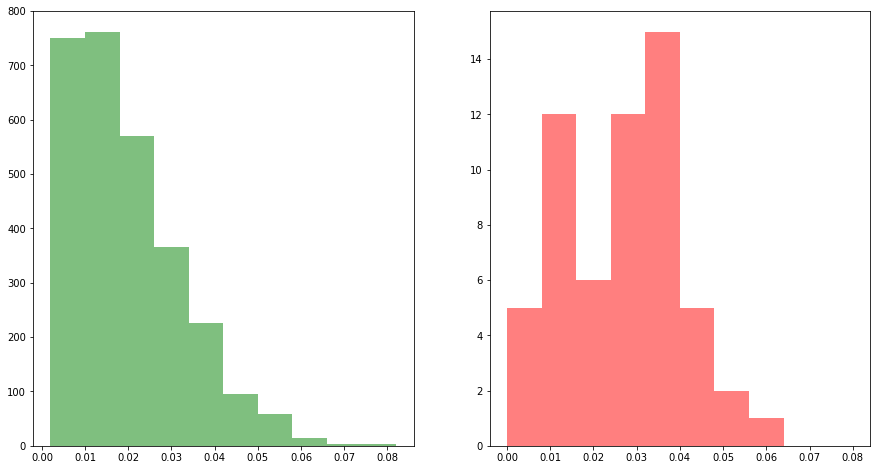

In [77]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
normal_error_df = error_df1[(error_df1['true_class']== 0) & (error_df1['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10, color = "green", alpha = 0.5)

ax1 = fig.add_subplot(122)
fraud_error_df = error_df1[error_df1['true_class'] == 1]
_ = ax1.hist(fraud_error_df.reconstruction_error.values, bins=10, color = "red", alpha = 0.5, range=(0, 0.08))

As previosuly mentioned in the hypothesis, the above histograms provide us with an insight into how the reconstuction errors are distributed for the fraud and non-fraud predictions. 

Non-fraud: As expected we see the curve peaking at low error. This can be interpretted as the model being able to recreate the non-fraud observations with a low error. 

Fraud: When bulding the model, we hoped to see a much higher magnitude for the disribution of errors which would help in idenfiying the 'anomalies', which in our case is the fraud. Although we do see on average that the errors are higher for frauds, there would be many observations in the overlapping areas of the histogram which can lead to either high false positives or false negatives depending on the threshold we set. 



### Boxplot of reconstruction errors

We wanted to create boxplots to understand how the averages of the reconstruction errors differ between the classes. Building on top of the interpretation from the histograms, we can observe our model is somewhat able to identify the frauds due to the higher mean of the reconstruction errors. The accuracy of our predictions are heavily affected by the outliers in the non-fraud reconstruction error, making it tougher to indentify the suitable threshold. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


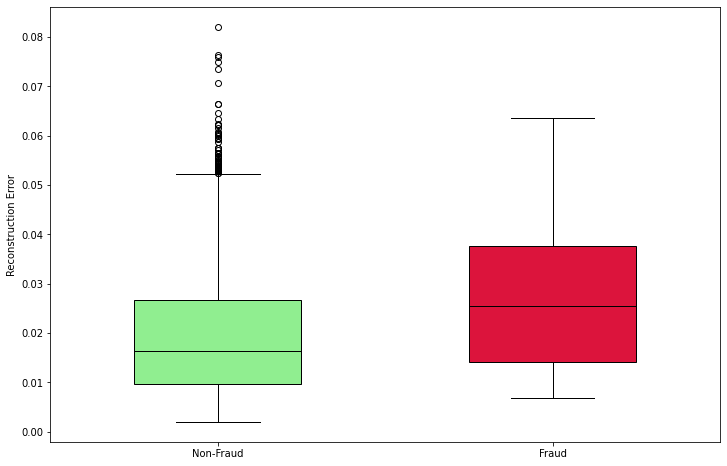

In [78]:
fig, ax = plt.subplots(1, 1,figsize=(12,8))
bplot = ax.boxplot([normal_error_df.reconstruction_error,fraud_error_df.reconstruction_error],patch_artist=True,widths=0.5,
                   medianprops=dict(color="black"),labels =['Non-Fraud','Fraud'])
plt.setp(bplot['boxes'], color='black')
plt.ylabel('Reconstruction Error')
for patch, color in zip(bplot['boxes'], ['lightgreen', 'crimson']):
    patch.set_facecolor(color)


### Visualising the AUC

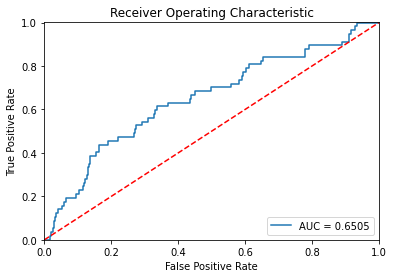

In [79]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

The above above graph shows the ROC curve and the AUC score for the autoencoder model. As expected, we can see that the model does not perform better than our SMOTE model. While it is a good starting point for further exploration, the lack of accuracy makes it difficult for us confidently predict frauds solely based on this model. 

As mentioned above, the threshold was calculated to be one standard deviation away from the mean reconstruction error of the non-fraud (training) dataset.

In [80]:
threshold = 0.016

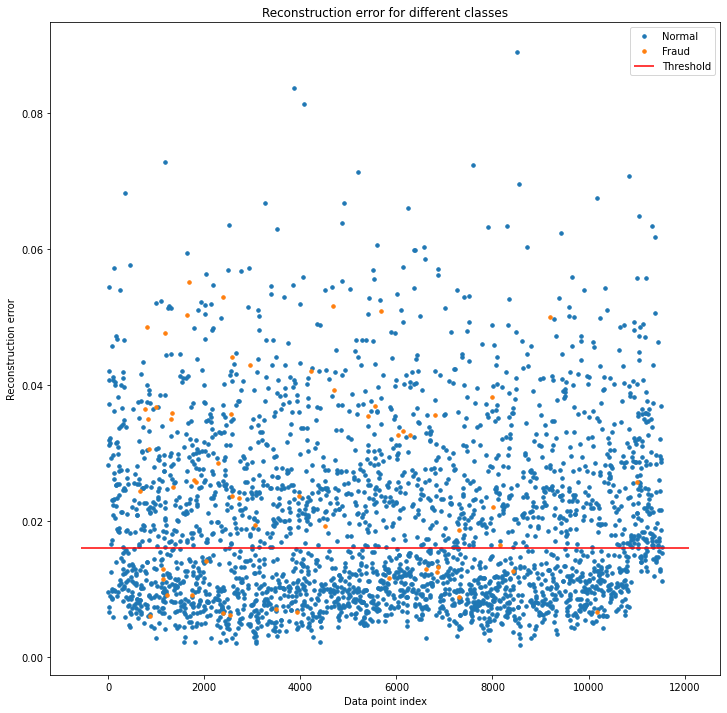

In [81]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12,12))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

The scatter plot above can provide more insight into why it is hard for the model to correctly identify frauds. Since the reconstuction error for many non-fraud observations are high, it is very diffcult to differntiate between normal and anomaly. Ideally, we would expect to see the  majority of the non-fraud reconstruction errors below the threshold and the majority of the frauds above the threshold.  

In [82]:
LABELS = ["Normal", "Fraud"]

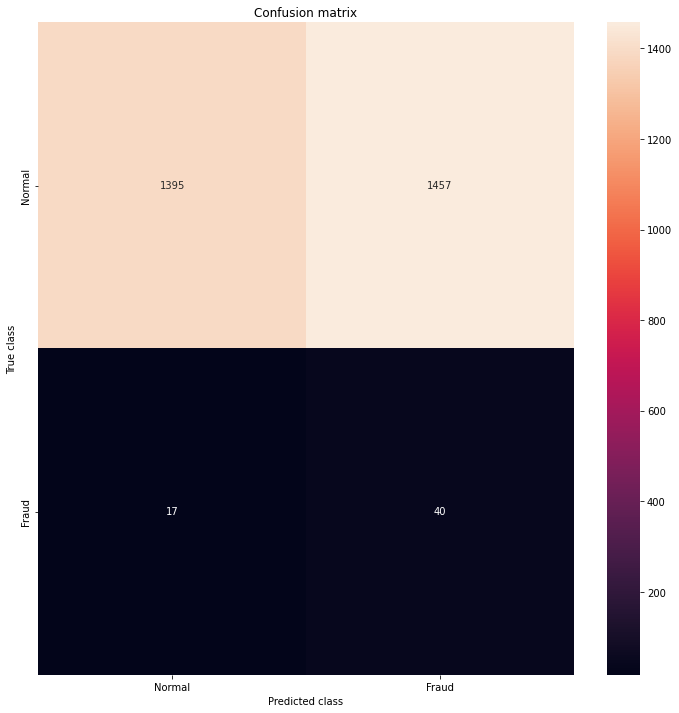

In [83]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Accuracy

In [84]:
# accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy3 = accuracy_score(y_pred,error_df.true_class)
print('Accuracy: %f' % accuracy3)

Accuracy: 0.493297


Precision

In [85]:
# precision = tp / (tp + fp)
precision3 = precision_score(y_pred,error_df.true_class)
print('Precision: %f' % precision3)

Precision: 0.701754


Recall Score

In [86]:
# recall = tp / (tp + fn)
recall3 = recall_score(y_pred,error_df.true_class)
print('Recall: %f' % recall3)

Recall: 0.026720


F1-Score

In [87]:
# f1: 2 tp / (2 tp + fp + fn)
f13 = f1_score(y_pred,error_df.true_class)
print('F1 score: %f' % f13)

F1 score: 0.051480


Looking at the confusion matrix above helps us understand how accurately and precisely the model predicts the test data. The positive outcome from this model is that it has a high recall rate (the ratio of correct positive predictions to the total positives examples). It is able to correctly classify the majority of the actual frauds. The downside of this model is that the precision score (the ratio of correct positive predictions to the total predicted positives) is low. Almost half the non-fraud data has been classified as fraud. 

From an insurance company's perspective, this model can be used to further investigate claims that have been predicted fraud but it will be cumbersome as they have to comb through many claims to identiy the actual frauds. It depends on the insurance company's cost of further investigating claims to see if this model can be viable.

# Question 9
**Question:** </br>
*As you know, it is difficult to understand precisely why a neural network makes a
specific prediction. Discuss why this might be problematic when the neural network
prediction leads to a fraud investigation by the insurance company. What alternatives
can you envision that make use of the techniques we have applied and allow for more
interpretability and transparency?*

Unlike a regression model (which can be thought of as a 1-layer network), where it is possible to identify any significant features by studying their coefficients easily, a neural network works by using multiple layers of nodes that have weighted inputs from the previous layer. This complex network of computations that lead to a prediction makes it challenging to understand how the features contribute to the final classification.
Correctly understanding the output of a neural network requires knowledge of the trained model, the algorithm, and the data used to build the model. Likewise, interpreting a neural network requires understanding the model's decision-making process, which can be gained by looking at the features used to build the model, their weights, and the parameters and structure of the model itself.

In the context of the `insurance_claims` dataset, this would mean looking at the weights of the various features on a modular level and conducting a close examination of any features deemed significant by the model. A fraud investigation triggered by a misclassified event will mean that the company will have to spend time and resources investigating the claim and face any loss of reputation. The implications of an investigation make it imperative to have a clear understanding of the prediction model.

When investigating claims classified as fraudulent, an examination of identified significant features will provide the relevant examiner with a clearer picture of the situation at hand.

One of the better machine learning models for interpretability and understanding can be a decision tree. The visual aspect of a decision tree helps understand what features of an individual leads to them being classified into the fraud category.

# Question 10
**Question:** </br>
*Use your synthetically extended dataset and train a simple model, such as logistic
regression or a decision tree that allows you to interpret why fraud is suspected. Keep
track of the accuracy and AUC on a test set made from original data only. How does
your model perform compared to the previous models you have developed? Does your
model allow you to answer a customer who asks, "why am I being investigated"?*

## Logistic Regression on the imbalanced dataset

Below is the logistic regression on the SMOTE data. The AUC and the accuracy score help see the predective capability of the model on the original test data.

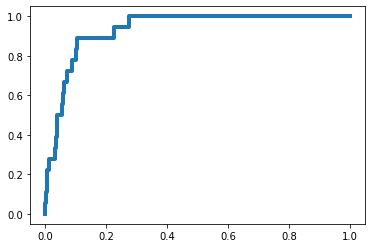

In [88]:
classifier_LR = LogisticRegression(max_iter=2000)
classifier_LR.fit(X_train_synth, y_train_synth.values.ravel())

y_pred_prob = classifier_LR.predict_proba(X_test_norm)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

Creating the confusion matrix with a random threshold

In [89]:
threshold = 0.1
y_test_pred = np.where(y_pred_prob < threshold, 0, 1)

metrics.confusion_matrix(y_test, y_test_pred)

array([[1341,  369],
       [   2,   16]])

Accuracy

In [90]:
accuracy4 = metrics.accuracy_score(y_test,y_test_pred)
accuracy4

0.7853009259259259

Precision

In [91]:
precision4 = metrics.precision_score(y_test, y_test_pred)
precision4

0.04155844155844156

AUC

In [92]:
auc4 = metrics.roc_auc_score(y_test, y_pred_prob)
auc4

0.9327810266406757

From the confusion matrix, we can see that the logistic regression model built on the SMOTE data is able to classify some observations as fraudulent, but most of them are falsely classified.

When compared to the other models, we see that the logistic regression on the SMOTE data performs much better that the original (basic) model. As seen before, we see a drop in the accuracy score like that of the SMOTE model, as the model learns from the additional fraudulent observations. With this model we also see a high AUC which implies that the predective ability of the model is high. However, the precision of this model is significantly lower than that of the neural network based on the SMOTE data. This shows that like the original model, even with the higher accuracy the predictive quality of the model is sub-optimal.

In [93]:
summary = pd.DataFrame([X_train.columns,classifier_LR.coef_[0]]).T.sort_values(by = 1, ascending = False)
summary.columns = ['Variable','Coefficient']
summary.head(n=10)

,Variable,Coefficient
46,ConnectionBetweenParties_SameAddress,6.103845
67,subscription_year,5.045882
27,ClaimCause_Fire,3.940314
5,ClaimAmount,3.580376
68,note_length,3.050242
35,ClaimCause_TheftAttempt,2.493889
38,ClaimCause_Vandalism,2.305373
37,ClaimCause_TotalTheft,2.246359
52,ClaimInvolvedCovers_ActLiability NaturalCatast...,2.187157
32,ClaimCause_LossOfControl,2.061323


If a client asks "Why am I being investigated?", we can use the outcome seen in the table above to determine what factors contribute to the prediction model and the investigation. The coefficients of the different variables con provide a general idea as to how the different factors contribute to the prediction that leads to an investigation. From the same, we can see that the variables `subscription_year`, `ConnectionBetweenParties_SameAddress`, and `note_length` are the highest contributors to a 'fraud' classification.

When we attempt to answer the same question using a neural network, the difficulty in interpreting the outcome makes it hard to asnwer the client's question. A deep analysis of the of the weights of individual nodes will provide some idea about the factors that led to a prediction. However, the sheer computational complexity of a neural network, makes it difficult to confidently conclude as to the significance of each of the factors.
This displays that even with the higher prediction accuracy of neural networks, their lack of interpretability is a downside compared to a normal logistic regression where the coefficients of the variables provide a clear picture of their significance.

### Conclusion 

In this project, the dataset poses one of the common problems of a real-life dataset: having a severe imbalance in the classes. Especially in the insurance fraud case, the minority class (actual fraud) is more important to predict. Therefore, this dataset can be categorised as a severe imbalance as only 1% of the data belongs to the minority class. 

The main problem we encountered with the base neural network is that by predicting all the cases as not frauds, the model achieves an accuracy of 99% just because of the distribution of the underlying dataset. 

The first way to tackle this problem is to use SMOTE, Synthetic Minority Oversampling Technique, which synthesises new data for the minority class using K nearest-neighbours. Once we had a synthetic dataset, we retrained a neural network to train the new dataset. To improve this model's hyperparameters, we use Hyperband to find the best learning rate, number of nodes, dropout rate and optimiser function. Once this model had been trained on the synthetic data, we tested it on the original data. The performance of this model was much better as it categorised the majority of fraud data well. 

To try and further improve our predictions, we used an auto-encoder. This method trains a model with only non-fraud cases, which can then identify anomalies that would be fraud cases. Unfortunately, the model is not very accurate in its predictions. As explained previously, the model cannot properly differentiate between anomaly and normal data. 

Our findings, as summarised in the table below show our SMOTE model provides the company with the best classification accuracy for this dataset.

In [94]:
metric_df = pd.DataFrame({'id': ['AUC', 'Accuracy', 'Precision'], 
                          'Original': [auc1, accuracy1, precision1], 
                          'SMOTE': [auc_keras, model_SMOTE.evaluate(X_test_norm, y_test)[5],model_SMOTE.evaluate(X_test_norm, y_test)[6]], 
                          'Autoencoded': [roc_auc, accuracy3, precision3],
                          'Logistic Regression': [auc4, accuracy4, precision4]
                          })
metric_df.set_index('id', inplace=True)

54/54 [==============================] - 0s 3ms/step - loss: 0.0988 - tp: 14.0000 - fp: 7.0000 - tn: 1703.0000 - fn: 4.0000 - accuracy: 0.9936 - precision: 0.6667 - recall: 0.7778 - auc: 0.8846 - prc: 0.4389


In [95]:
metric_df

,Original,SMOTE,Autoencoded,Logistic Regression
id,,,,
AUC,0.500000,0.952550,0.650544,0.932781
Accuracy,0.989583,0.993634,0.493297,0.785301
Precision,0.000000,0.666667,0.701754,0.041558
